In [62]:
import pandas as pd
import numpy as np
from datetime import datetime
import math
from sklearn.metrics import accuracy_score
import collections
from sklearn.cluster import KMeans
import numpy as np

In [63]:
#Reading train file

In [64]:
df = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [65]:
df[df.incident_cord_x == 0].head(5)

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type
234,08-Mar-2044 14:00:00,0.0,0.0,1.0,6,RAPE
277,21-Jun-2044 01:01:00,0.0,0.0,1.0,0,RAPE
491,25-Jul-2044 22:00:00,0.0,0.0,1.0,5,RAPE
499,27-Oct-2044 16:30:00,0.0,0.0,1.0,13,RAPE
619,23-Jun-2044 05:00:00,0.0,0.0,1.0,18,RAPE


In [66]:
df_test["Crime_Type"] = "To_be_predict"

In [67]:
df.shape, df_test.shape

((26000, 6), (2000, 6))

In [68]:
df["data_type"]  = "Train_data"
df_test["data_type"] = "Test data"

In [69]:
df_master  = pd.concat([df, df_test], ignore_index=True)
df_master.shape

(28000, 7)

In [70]:
df_master.head()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,data_type
0,06-Jun-2044 01:54:00,26.622589,-38.446780,1.0,0,LARCENY-FROM VEHICLE,Train_data
1,10-Jun-2044 13:00:00,26.619337,-38.441202,1.0,13,LARCENY-NON VEHICLE,Train_data
2,25-Feb-2044 09:00:00,26.616737,-38.444000,1.0,4,LARCENY-NON VEHICLE,Train_data
3,02-Jun-2044 09:30:00,26.620286,-38.444994,1.0,33,LARCENY-NON VEHICLE,Train_data
4,16-Mar-2044 19:20:00,26.626383,-38.443595,1.0,15,AUTO THEFT,Train_data


In [262]:
#df_master  =df_master.reset_index(drop= True)
#df_master = df_master.sort_index()
#df_master = df_master.sort(["data_type"], ascending= False)
#df_master

In [71]:
df_master.tail()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,data_type
27995,27-Aug-2044 22:15:00,26.623449,-38.443225,1.0,13,To_be_predict,Test data
27996,09-Feb-2044 13:24:00,26.617790,-38.442426,1.0,31,To_be_predict,Test data
27997,26-Nov-2044 12:45:00,26.619115,-38.443991,1.0,10,To_be_predict,Test data
27998,25-Nov-2044 16:00:00,26.614555,-38.439522,1.0,13,To_be_predict,Test data
27999,02-Dec-2044 20:20:00,26.618205,-38.441152,1.0,10,To_be_predict,Test data


In [220]:
#df[df.isnull().any(axis=1)].head(5)

In [72]:
df.tail()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,data_type
25995,09-Nov-2044 07:45:00,26.618441,-38.442300,1.0,10,LARCENY-FROM VEHICLE,Train_data
25996,10-Mar-2044 21:00:00,26.622858,-38.442917,1.0,0,LARCENY-FROM VEHICLE,Train_data
25997,19-Aug-2044 09:45:00,26.626018,-38.443824,1.0,13,BURGLARY-RESIDENCE,Train_data
25998,11-Mar-2044 02:00:00,26.621843,-38.441654,1.0,13,AUTO THEFT,Train_data
25999,10-Oct-2044 22:00:00,26.617635,-38.442312,1.0,10,LARCENY-FROM VEHICLE,Train_data


In [73]:
#filling nan of num victims
#df_master = df_master.fillna(-1)

def time_var(df):
    df["incident_datetime"] = pd.to_datetime(df["incident_datetime"])
    df["Year"] = df["incident_datetime"].dt.year
    df["Month"] = df["incident_datetime"].dt.month
    df["Hour"] = df["incident_datetime"].dt.hour
    df["Day"] = df["incident_datetime"].dt.day
    df["Weekday"] = df["incident_datetime"].dt.weekday
    bins =  [-0.001,3,6,9,12,15,18,21,24]
    df['Hour'] = pd.cut(df['Hour'], bins, labels=["0-3", "3-6", "6-9","9-12", "12-15", "15-18", "18-21", "21-24"])
    
    bins =  [-1.1,-0.01,0,1,2,3,4,5,7,9,1000]
    df["num_victims"] = pd.cut(df['num_victims'], bins, labels=["Mis","0","1", "2", "3", "4","5", "6-7", "8-9", "10-inf"])

    return df
#df_master = time_var(df_master)

def cluster_grid(df, df_master):
    kmeans = KMeans(n_clusters=10, random_state=0).fit(df.loc[:, ["incident_cord_x", "incident_cord_y"]])
    label =  kmeans.predict(df_master.loc[:, ["incident_cord_x", "incident_cord_y"]])
    df_master["grid"] = label
    return df_master
#df_master = cluster_grid(df, df_master)

def loc_fill(df):
    loc_train_x , loc_train_y = df[df.location_type != 0].loc[:, ["incident_cord_x",  "incident_cord_y"]], df[df.location_type != 0].loc[:, ["location_type"]]
    loc_test_x, loc_test_y = df[df.location_type == 0].loc[:, ["incident_cord_x",  "incident_cord_y"]], df[df.location_type == 0].loc[:, ["location_type"]]
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(loc_train_x, loc_train_y)
    y_predict_knn_loc = neigh.predict(loc_test_x)
    for i in range(0,len(loc_test_y)):
        loc_test_y.iloc[i,] = y_predict_knn_loc[i]
    df_l_1 =  pd.concat([loc_train_x, loc_train_y], axis=1)
    df_l_0 =  pd.concat([loc_test_x, loc_test_y], axis=1)
    df_l  = pd.concat([df_l_1, df_l_0]).sort_index()
    df_drop = df.drop(["incident_cord_x", "incident_cord_y", "location_type"], axis = 1)
    df = pd.concat([df_drop, df_l], axis = 1)
    return df
#df_master = loc_fill(df_master)


In [74]:
#df_master = df_master.fillna(-1)
df = df.fillna(-1)

#changing df
df = time_var(df)
df = cluster_grid(df, df)
df = loc_fill(df)

#changing master
df_master = time_var(df_master)
df_master = cluster_grid(df, df_master)
df_master = loc_fill(df_master)

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [75]:
df_master.head()

,incident_datetime,num_victims,Crime_Type,data_type,Year,Month,Hour,Day,Weekday,grid,incident_cord_x,incident_cord_y,location_type
0,2044-06-06 01:54:00,1,LARCENY-FROM VEHICLE,Train_data,2044.0,6.0,0-3,6.0,0.0,2,26.622589,-38.446780,15
1,2044-06-10 13:00:00,1,LARCENY-NON VEHICLE,Train_data,2044.0,6.0,12-15,10.0,4.0,0,26.619337,-38.441202,13
2,2044-02-25 09:00:00,1,LARCENY-NON VEHICLE,Train_data,2044.0,2.0,6-9,25.0,3.0,3,26.616737,-38.444000,4
3,2044-06-02 09:30:00,1,LARCENY-NON VEHICLE,Train_data,2044.0,6.0,6-9,2.0,3.0,9,26.620286,-38.444994,33
4,2044-03-16 19:20:00,1,AUTO THEFT,Train_data,2044.0,3.0,18-21,16.0,2.0,8,26.626383,-38.443595,15


In [43]:
df_master.tail()

,incident_datetime,incident_cord_x,incident_cord_y,num_victims,location_type,Crime_Type,data_type
27995,27-Aug-2044 22:15:00,26.623449,-38.443225,1.0,13,To_be_predict,Test data
27996,09-Feb-2044 13:24:00,26.617790,-38.442426,1.0,31,To_be_predict,Test data
27997,26-Nov-2044 12:45:00,26.619115,-38.443991,1.0,10,To_be_predict,Test data
27998,25-Nov-2044 16:00:00,26.614555,-38.439522,1.0,13,To_be_predict,Test data
27999,02-Dec-2044 20:20:00,26.618205,-38.441152,1.0,10,To_be_predict,Test data


# Visualization

In [120]:
#df.groupby("grid")[["grid"]].count()

In [121]:
#df.groupby("grid")[["Crime_Type"]].count()

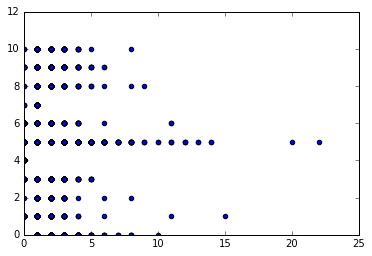

In [377]:
t =['AGG ASSAULT','AUTO THEFT','BURGLARY-NONRES','BURGLARY-RESIDENCE','LARCENY-FROM VEHICLE','LARCENY-NON VEHICLE','RAPE','ROBBERY-COMMERCIAL','ROBBERY-PEDESTRIAN','ROBBERY-RESIDENCE']
ct = labelencoder_Y.fit_transform(df.Crime_Type)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( list(df.num_victims),list(ct))
plt.axis([0, 25, 0, 12])
plt.figure(figsize=(150,310))
plt.show()

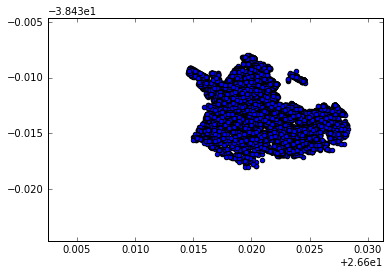

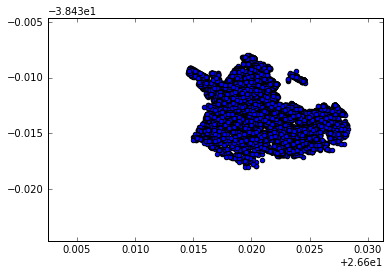

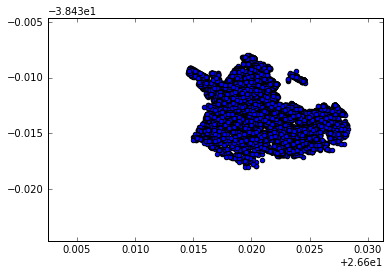

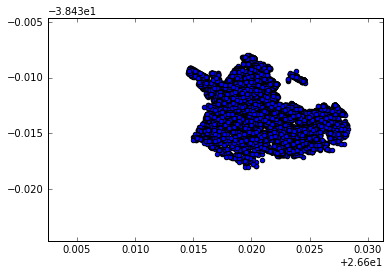

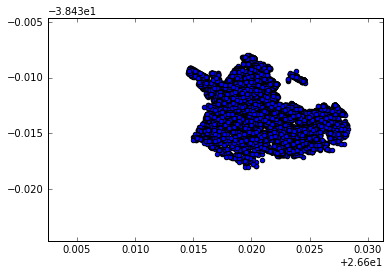

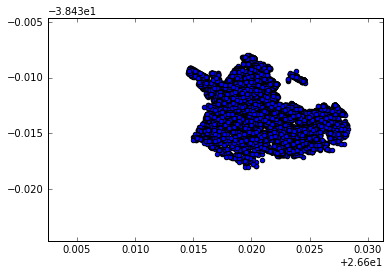

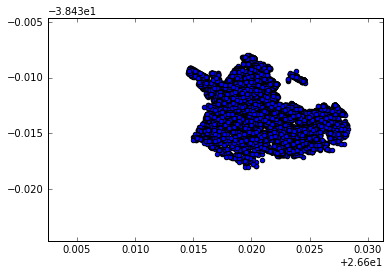

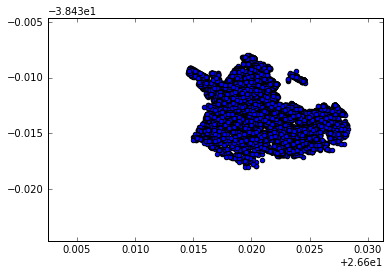

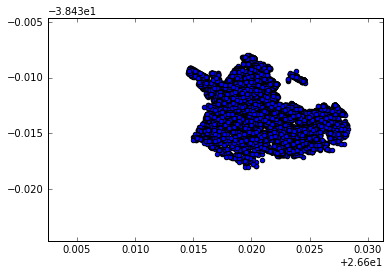

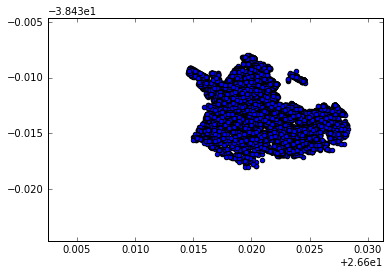

In [265]:
t =['AGG ASSAULT','AUTO THEFT','BURGLARY-NONRES','BURGLARY-RESIDENCE','LARCENY-FROM VEHICLE','LARCENY-NON VEHICLE','RAPE','ROBBERY-COMMERCIAL','ROBBERY-PEDESTRIAN','ROBBERY-RESIDENCE']
for i in t:
    x_ = df.incident_cord_x
    y_ =  df.incident_cord_y
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.scatter( x_,y_)
    plt.axis([26.60251568, 26.63130215, -38.45465708, -38.43460511])
    plt.figure(figsize=(150,310))
    plt.show()

In [43]:
df.columns

Index(['incident_datetime', 'num_victims', 'Crime_Type', 'data_type', 'Year',
       'Month', 'Hour', 'Day', 'Weekday', 'grid', 'incident_cord_x',
       'incident_cord_y', 'location_type'],
      dtype='object')

In [ ]:
#Dummification

In [76]:
v = ['location_type', 'Year', 'Month','Hour', 'grid',"Day", "Weekday", "num_victims"]
print('Before dummification we have {} variables in train'.format(df.shape[1]))
df1 = pd.get_dummies(df, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(df1.shape[1]))

Before dummification we have 13 variables in train
After dummification we have 117 variables in train


In [54]:
#v = ['location_type', 'Year', 'Month','Hour', 'grid',"Day", "Weekday", "num_victims"]
#print('Before dummification we have {} variables in train'.format(df_master.shape[1]))
#df_master = pd.get_dummies(df_master, columns=v, drop_first=True)
#print('After dummification we have {} variables in train'.format(df_master.shape[1]))

In [77]:
df2 = df1

In [78]:
Y = df2[ 'Crime_Type'].values
from sklearn import preprocessing
labelencoder_Y = preprocessing.LabelEncoder()
y = labelencoder_Y.fit_transform(Y)
df2.Crime_Type = y
set(y), set(Y)

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10},
 {'AGG ASSAULT',
  'AUTO THEFT',
  'BURGLARY-NONRES',
  'BURGLARY-RESIDENCE',
  'HOMICIDE',
  'LARCENY-FROM VEHICLE',
  'LARCENY-NON VEHICLE',
  'RAPE',
  'ROBBERY-COMMERCIAL',
  'ROBBERY-PEDESTRIAN',
  'ROBBERY-RESIDENCE'})

In [79]:
df.groupby("Crime_Type")[["Crime_Type"]].count()

,Crime_Type
Crime_Type,
AGG ASSAULT,1981
AUTO THEFT,3396
BURGLARY-NONRES,876
BURGLARY-RESIDENCE,3041
HOMICIDE,97
LARCENY-FROM VEHICLE,8861
LARCENY-NON VEHICLE,5898
RAPE,133
ROBBERY-COMMERCIAL,191


In [ ]:
#Feautre scaling

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_f = df2.drop(['Crime_Type', "incident_datetime", 'incident_cord_x', 'incident_cord_y',"data_type"], axis=1)
selector = SelectKBest(chi2, k=50)
selector.fit(X_f, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
X_new = X_f[idxs_selected]
X_new.head()

,location_type_2,location_type_3,location_type_4,location_type_5,location_type_6,location_type_9,location_type_10,location_type_11,location_type_12,location_type_13,...,grid_7,grid_8,grid_9,Weekday_6.0,num_victims_0,num_victims_1,num_victims_2,num_victims_3,num_victims_4,num_victims_5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
X_new.columns, len(X_new.columns)

(Index(['location_type_2', 'location_type_3', 'location_type_4',
        'location_type_5', 'location_type_6', 'location_type_9',
        'location_type_10', 'location_type_11', 'location_type_12',
        'location_type_13', 'location_type_14', 'location_type_15',
        'location_type_16', 'location_type_17', 'location_type_18',
        'location_type_20', 'location_type_22', 'location_type_27',
        'location_type_28', 'location_type_29', 'location_type_30',
        'location_type_31', 'location_type_32', 'location_type_33',
        'Year_2039.0', 'Year_2042.0', 'Year_2043.0', 'Hour_3-6', 'Hour_6-9',
        'Hour_9-12', 'Hour_12-15', 'Hour_15-18', 'Hour_18-21', 'Hour_21-24',
        'grid_1', 'grid_2', 'grid_3', 'grid_4', 'grid_5', 'grid_6', 'grid_7',
        'grid_8', 'grid_9', 'Weekday_6.0', 'num_victims_0', 'num_victims_1',
        'num_victims_2', 'num_victims_3', 'num_victims_4', 'num_victims_5'],
       dtype='object'), 50)

In [ ]:
#Split Data set - training and test

In [83]:
#y_train = y_train.reset_index(drop = True)

In [84]:
#df_maj = pd.concat([pd.DataFrame(X_train, columns=list(X_train.columns)), pd.Series(y_train)], axis =1)
#df_maj1 =  df_maj.loc[(df_maj.Crime_Type == 0) | (df_maj.Crime_Type == 1)| (df_maj.Crime_Type == 3)| (df_maj.Crime_Type == 5) | (df_maj.Crime_Type == 6)]
#df_maj1
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(df_maj1.drop(["Crime_Type"], axis =1 ),
                                                    df_maj1.Crime_Type, test_size=0.30, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                    df2.Crime_Type, test_size=0.30, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18200, 50), (18200,), (7800, 50), (7800,))

In [ ]:
#Scaling

In [54]:
#
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [ ]:
#final chose model

In [87]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [88]:
clf_xgb1 = xgb.XGBClassifier(max_depth = 7, learning_rate= 0.16, n_estimators= 25, nthread=14)

In [90]:
#clf_xgb1 = RandomizedSearchCV(clf_xgb1,param,refit=True,cv=3)
clf_xgb1.fit(X_train,y_train)
predictions_xgb1 = clf_xgb1.predict(X_test)
print(accuracy_score(y_test, predictions_xgb1))
#print(clf_xgb1.best-estimator_)

0.514871794872


In [282]:
# Kfold
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf_xgb1, X = X_train, y = y_train, cv = 3)
accuracies

array([ 0.51285008,  0.51359815,  0.50437077])

In [ ]:
#predicting on test

In [26]:
col_sel = list(X_test.columns)

In [27]:
df_eval = df_master[col_sel][df_master.data_type ==  "Test data"]

In [28]:
df_eval.columns, df_eval.shape

(Index(['location_type_3', 'location_type_4', 'location_type_5',
        'location_type_6', 'location_type_10', 'location_type_11',
        'location_type_12', 'location_type_13', 'location_type_14',
        'location_type_15', 'location_type_16', 'location_type_17',
        'location_type_22', 'location_type_27', 'location_type_28',
        'location_type_29', 'location_type_30', 'location_type_31',
        'location_type_32', 'location_type_33', 'Year_2039.0', 'Year_2042.0',
        'Hour_3-6', 'Hour_6-9', 'Hour_9-12', 'Hour_12-15', 'Hour_15-18',
        'Hour_21-24', 'grid_1', 'grid_3', 'grid_5', 'grid_7', 'grid_9',
        'grid_11', 'grid_12', 'grid_14', 'grid_17', 'grid_18', 'grid_19',
        'grid_20', 'grid_21', 'grid_22', 'grid_23', 'grid_24', 'grid_25',
        'grid_29', 'num_victims_1', 'num_victims_2', 'num_victims_3',
        'num_victims_4'],
       dtype='object'), (2000, 50))

In [30]:
y_eval = clf_xgb1.predict(df_eval)
y_eval

array([0, 3, 1, ..., 5, 3, 5])

In [35]:
final_result = pd.DataFrame(y_eval , columns= ["y_eval"])

In [36]:
final_result.to_csv("final_result.csv")

# MODELS

In [330]:
#Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(min_samples_split=15, max_depth= 15)
clf.fit(X_train, y_train)
y_predict_dt = clf.predict(X_test)
accuracy_score(y_test, y_predict_dt)

0.49717948717948718

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5','class 6', 'class 7', 'class 8','class 9', 'class 10']
print(classification_report(y_test, y_predict_dt, target_names=target_names, digits=4))

In [333]:
#KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_predict_knn = neigh.predict(X_test)
accuracy_score(y_test, y_predict_knn)

0.443974358974359

In [ ]:
target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5','class 6', 'class 7', 'class 8','class 9', 'class 10']
print(classification_report(y_test, y_predict_knn, target_names=target_names, digits=4))

In [337]:
#Randon forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(X_train, y_train)
y_predict_rf  = rf.predict(X_test)
accuracy_score(y_test, y_predict_rf)

0.50192307692307692

In [ ]:
# Kernel SVM

In [51]:
from sklearn.svm import SVC
clf_kcv = SVC(kernel = 'rbf', random_state = 0)
#clf_kcv = RandomizedSearchCV(classifier,param,refit=True,cv=3)
clf_kcv.fit(X_train,y_train)
predictions_kcv = clf_kcv.predict(X_test)
accuracy_score(y_test, predictions_kcv)

0.50948717948717948

In [386]:
#SVC

In [52]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf_lsvc = LinearSVC(random_state=0)
clf_lsvc.fit(X_train, y_train)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='24', random_state=0, tol=0.0001,
     verbose=0)
predict_svc  = clf_lsvc.predict(X_test)
accuracy_score(y_test, predict_svc)

0.50538461538461543

In [ ]:
print(classification_report(y_test, predict_svc, target_names=target_names, digits=4))

In [440]:
#XGB

In [161]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
predict_xgb = clf_xgb.predict(X_test)
accuracy_score(y_test, predict_xgb)

0.50525641025641022

In [ ]:
#ADA

In [162]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, learning_rate=0.75, random_state=101)
clf_ada.fit(X_train, y_train)
predict_ada = clf_ada.predict(X_test)

accuracy_score(y_test, predict_ada)

0.4785897435897436

In [164]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_class = 11

param = set_param()
watchlist = [ (dtrain,'train'), (dtest, 'eval') ]
num_round = 22

# Train XGBoost    
bst = xgb.train(param, dtrain, num_round, watchlist);
yprob = bst.predict(dtest).reshape( y_test.shape[0], num_class)
ylabel = np.argmax(yprob, axis=1)

[0]	train-mlogloss:1.76783	eval-mlogloss:1.76862
[1]	train-mlogloss:1.50695	eval-mlogloss:1.50911
[2]	train-mlogloss:1.437	eval-mlogloss:1.44295
[3]	train-mlogloss:1.40717	eval-mlogloss:1.4171
[4]	train-mlogloss:1.39275	eval-mlogloss:1.40459
[5]	train-mlogloss:1.38511	eval-mlogloss:1.39854
[6]	train-mlogloss:1.38045	eval-mlogloss:1.39489
[7]	train-mlogloss:1.37787	eval-mlogloss:1.39367
[8]	train-mlogloss:1.37638	eval-mlogloss:1.39415
[9]	train-mlogloss:1.37527	eval-mlogloss:1.39281
[10]	train-mlogloss:1.37453	eval-mlogloss:1.39393
[11]	train-mlogloss:1.37416	eval-mlogloss:1.39387
[12]	train-mlogloss:1.37364	eval-mlogloss:1.39374
[13]	train-mlogloss:1.37338	eval-mlogloss:1.39403
[14]	train-mlogloss:1.37311	eval-mlogloss:1.39405
[15]	train-mlogloss:1.37282	eval-mlogloss:1.39411
[16]	train-mlogloss:1.37261	eval-mlogloss:1.39511
[17]	train-mlogloss:1.37244	eval-mlogloss:1.39537
[18]	train-mlogloss:1.37224	eval-mlogloss:1.39558
[19]	train-mlogloss:1.37201	eval-mlogloss:1.39586
[20]	train-ml

In [166]:
accuracy_score(y_test, ylabel)

0.50397435897435894

In [ ]:
#Gridsearch cv

In [21]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [130]:
clf_xgb1 = xgb.XGBClassifier(max_depth = 7, learning_rate= 0.16, n_estimators= 25, nthread=14)

In [36]:
param = {'max_depth': [3,  5, 10, 12]  , 'learning_rate' :[0.1, 0.14, .16, 0.17]
         , 'n_estimators' : [20,25,150,250],
        'nthread' : [16],
        "max_delta_step": [0,1]}

In [144]:
clf_xgb1 = RandomizedSearchCV(clf_xgb1,param,refit=True,cv=3)
clf_xgb1.fit(X_train,y_train)
predictions_xgb1 = clf_xgb1.predict(X_test)
print(accuracy_score(y_test, predictions_xgb1))
#print(clf_xgb1.best-estimator_)

0.519743589744


In [145]:
# Kfold
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf_xgb1, X = X_train, y = y_train, cv = 3)
accuracies

array([ 0.51285008,  0.51359815,  0.50437077])

In [ ]:
print(classification_report(y_test,  predictions_xgfb_cv, target_names=target_names, digits=4))

In [71]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam',learning_rate = 'adaptive',learning_rate_init= 0.005,
                    hidden_layer_sizes=(50, 3), random_state=1, activation = "identity")
#print(clf.fit(X, y))  

In [72]:
clf.fit(X_train, y_train)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 3), learning_rate='adaptive',
       learning_rate_init=0.005, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [73]:
y_mlp = clf.predict(X_test)

In [74]:
accuracy_score(y_test, y_mlp)

0.49769230769230771

# ANN

In [24]:
#importing modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
#y = np_utils.to_categorical([y_train])
y = labelencoder_Y.fit_transform(y_train)
y = np_utils.to_categorical(y)

In [27]:
X_train.shape

(18200, 30)

In [28]:
classifier = Sequential()

In [29]:
#adding first hidden layer
classifier.add(Dense (output_dim = 40, init = "uniform", activation= "relu", input_dim= 30, ))
#adding Third hidden layer
classifier.add(Dense (output_dim = 40, init = "uniform", activation= "relu"))
#adding Third hidden layer
classifier.add(Dense (output_dim = 40, init = "uniform", activation= "relu"))
#adding final
classifier.add(Dense (output_dim = 11, init = "uniform", activation= "softmax"))
#compile
classifier.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
#X_train = np.array(X_train)
#Fitting the ANN to the traning set
#classifier.fit(X_train,y,batch_size = 25 ,nb_epoch=25)

In [48]:
y_pred = classifier.predict(np.array(X_test))
X = []
for i in range(0, len(y_pred)):
    X =  X + [np.argmax(y_pred[i])]
s1 = pd.Series(X)
s2 =pd.Series(y_test)
accuracy_score(s2, s1)

0.50923076923076926

In [ ]:
#Voting

In [57]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf = VotingClassifier(estimators=[('dt', clf), ('rf', rf),('kcv', clf_kcv)],
voting='hard', weights=[1,1,1],flatten_transform=True)
eclf = eclf.fit(X_train, y_train)
print(eclf.predict(X_test))

[3 5 5 ..., 5 6 3]


In [58]:
y_vote = eclf.predict(X_test)
accuracy_score(y_vote, y_test)

0.50705128205128203

# Archive

In [ ]:
'''
def x_grid(row, Range_x, Min_x, X_grid ):
    for i in range(1,len(X_grid) + 1):
        if row['incident_cord_x'] <= (Min_x + (Range_x*(i)/16)) and row['incident_cord_x'] >= (Min_x + (Range_x*(i-1)/16)):
            return X_grid[i-1]

        
def y_grid(row, Range_y, Min_y, Y_grid ):
    for i in range(1,len(Y_grid) + 1):
        if row['incident_cord_y'] <= (Min_y + (Range_y*(i)/16)) and row['incident_cord_y'] >= (Min_y + (Range_y*(i-1)/16)):
            return Y_grid[i-1]

        
X_grid = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]
Range_x = max(df.incident_cord_x) - min(df.incident_cord_x[df.incident_cord_x != 0])
Min_x = min(df.incident_cord_x[df.incident_cord_x != 0])

Y_grid = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Range_y = max(df.incident_cord_y[df.incident_cord_y != 0]) - min(df.incident_cord_y[df.incident_cord_y != 0])
Min_y = min(df.incident_cord_y[df.incident_cord_y != 0])

df['x_grid'] = df.apply(lambda x: x_grid(x,Range_x, Min_x, X_grid ), axis=1)
df["y_grid"] = df.apply(lambda x: y_grid(x, Range_y, Min_y, Y_grid ), axis=1)

df["grid"] = df.x_grid + df.y_grid.map(str)
'''

In [ ]:
'''#HOMICIDE, RAPE, ROBBERY-COMMERCIAL, ROBBERY-RESIDENCE

from sklearn.utils import resample
# Upsample minority class
def sampling(X_train, y_train):
    df_train_temp = X_train
    df_train_temp['Crime_Type'] = y_train
    df_minority6 = df_train_temp[df_train_temp.Crime_Type == 6]
    df_minority7 = df_train_temp[df_train_temp.Crime_Type == 7]
    df_minority9 = df_train_temp[df_train_temp.Crime_Type == 9]

    df_minority0 = df_train_temp[df_train_temp.Crime_Type == 0]
    df_minority2 = df_train_temp[df_train_temp.Crime_Type == 2]
    df_minority8 = df_train_temp[df_train_temp.Crime_Type == 8]

    df_minority1 = df_train_temp[df_train_temp.Crime_Type == 1]
    df_minority3 = df_train_temp[df_train_temp.Crime_Type == 3]
    df_minority4 = df_train_temp[df_train_temp.Crime_Type == 4]
    df_minority10 = df_train_temp[df_train_temp.Crime_Type == 10]

    df_minority_undersampled0 = resample(df_minority0, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results

    df_minority_undersampled2 = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=801*1,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results

    df_minority_undersampled4 = resample(df_minority4, 
                                 replace=True,     # sample with replacement
                                 n_samples= 100,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
    df_minority_undersampled7 = resample(df_minority7, 
                                 replace=True,     # sample with replacement
                                 n_samples= 100,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
    df_minority_undersampled8 = resample(df_minority8, 
                                 replace=True,     # sample with replacement
                                 n_samples= 100,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
    df_minority_undersampled9 = resample(df_minority9, 
                                 replace=True,     # sample with replacement
                                 n_samples= 700,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
    df_minority_undersampled10 = resample(df_minority10, 
                                 replace=True,     # sample with replacement
                                 n_samples= 100,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    df_minority = pd.concat([df_train_temp, df_minority_undersampled0, df_minority_undersampled2, df_minority_undersampled4,
                            df_minority_undersampled7, df_minority_undersampled8, df_minority_undersampled9,df_minority_undersampled10])
    X_train = df_minority.drop(['Crime_Type']
    #y_train = df_minority.Crime_Type                         
    return print("a")'''

In [ ]:
'''from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
GaussianNB(priors=None)
y_predict_nb = NB.predict(X_test)
accuracy_score(y_test, y_predict_nb)'''

In [ ]:
'''from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False,
                              store_covariances=None, tol=0.0001)
y_predict_qda = qda.predict(X_test)
accuracy_score(y_test, y_predict_qda)'''

In [ ]:
#y_predict_rf, y_predict_nb
#s2 =pd.Series(y_test)
'''
df_v = pd.concat([s1, pd.Series(predictions_xgfb_cv), pd.Series(y_predict_rf), pd.Series(y_predict_knn), pd.Series(predict_svc), pd.Series(y_pred_XGB), pd.Series(y_pred_ADA)  ], axis = 1)
vote = df_v.apply(lambda x : collections.Counter(x).most_common(1)[0][0], axis = 1)
accuracy_score(y_test, vote)
#len(s2), len(y_predict_dt), len(y_pred_ADA), len(y_predict_knn), len(predict_svc)
s2 = s2.sort_index().reset_index(drop = True)
'''

# Test Data

In [149]:
df_test = pd.read_csv("Train.csv")

In [150]:
df_test.shape

(26000, 6)